In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

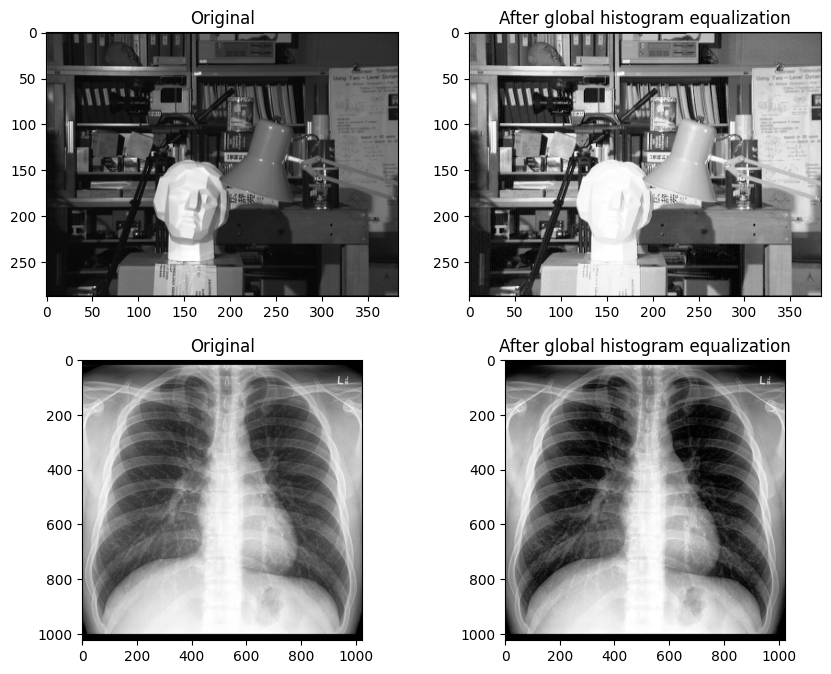

In [15]:
firstImage = cv2.imread('statue.png', 0)
secondImage = cv2.imread('xray.jpg', 0)

firstResult = cv2.equalizeHist(firstImage)
secondResult = cv2.equalizeHist(secondImage)


plt.figure(figsize=[10,8])
plt.subplot(221);plt.imshow(firstImage, cmap='gray');plt.title("Original");
plt.subplot(222);plt.imshow(firstResult, cmap='gray');plt.title("After global histogram equalization");

plt.subplot(223);plt.imshow(secondImage, cmap='gray');plt.title("Original");
plt.subplot(224);plt.imshow(secondResult, cmap='gray');plt.title("After global histogram equalization");

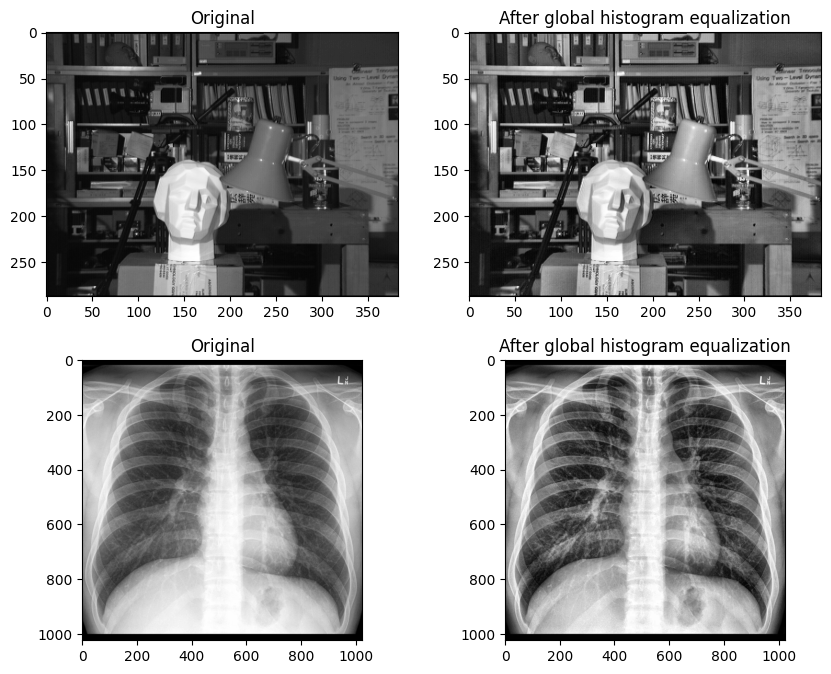

In [16]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result1 = clahe.apply(firstImage)

Clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result2 = Clahe.apply(secondImage)

plt.figure(figsize=[10,8])
plt.subplot(221);plt.imshow(firstImage, cmap='gray');plt.title("Original");
plt.subplot(222);plt.imshow(result1, cmap='gray');plt.title("After global histogram equalization");

plt.subplot(223);plt.imshow(secondImage, cmap='gray');plt.title("Original");
plt.subplot(224);plt.imshow(result2, cmap='gray');plt.title("After global histogram equalization");

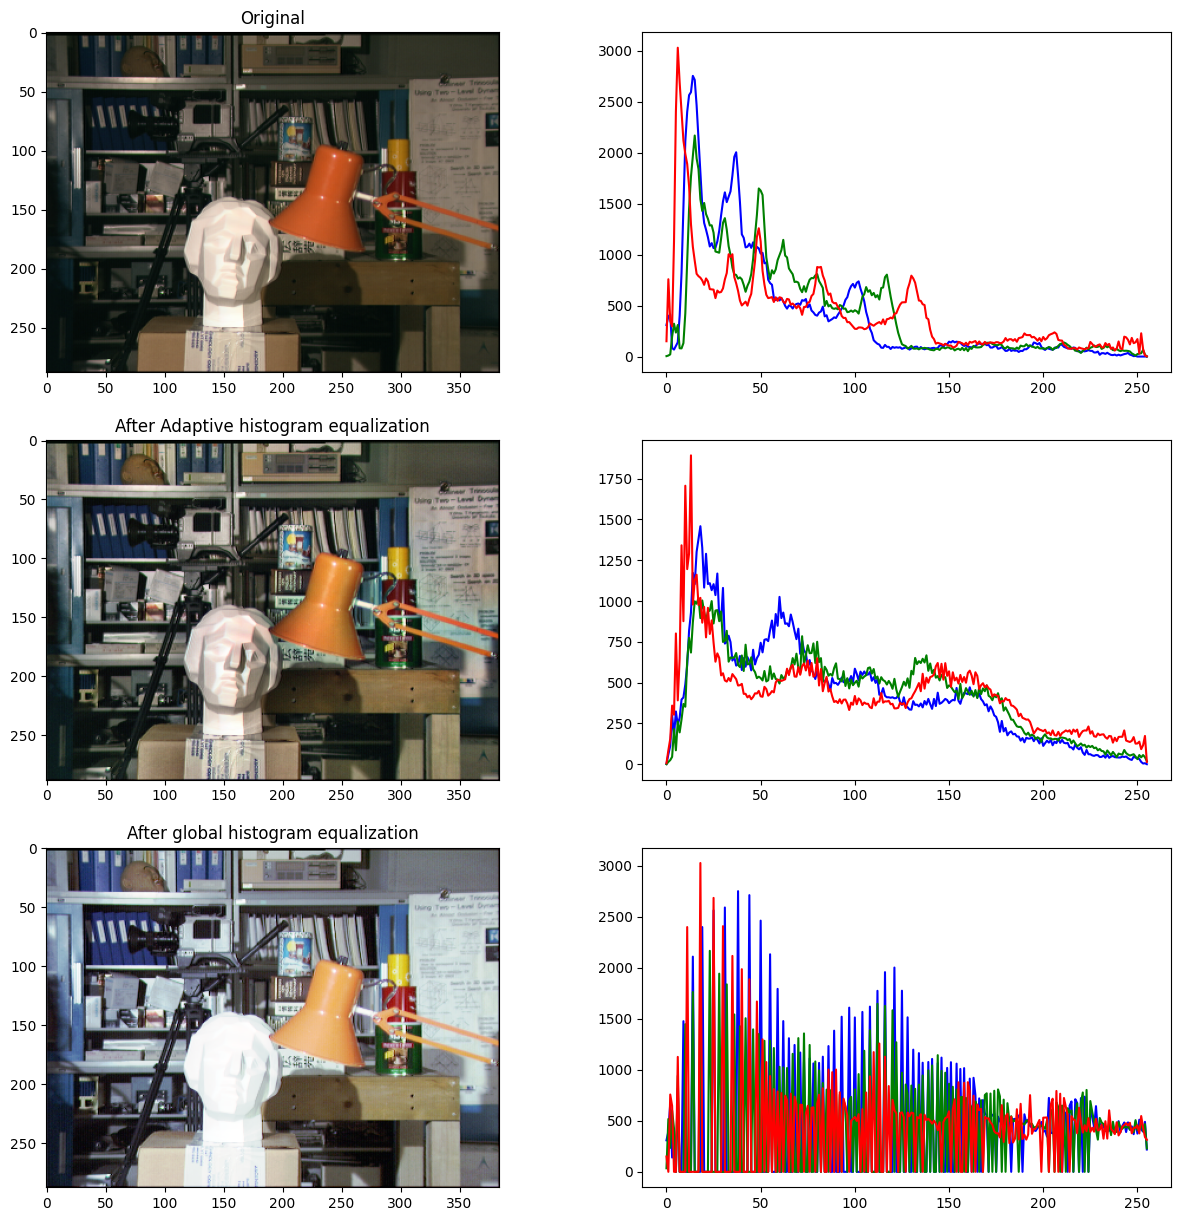

In [17]:
image = cv2.imread('statue.png')

channels = cv2.split(image)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)

eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.title("After Adaptive histogram equalization");
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.title("After global histogram equalization");


color = ('b', 'g', 'r')

plt.subplot(322);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

plt.subplot(324);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
plt.subplot(326);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

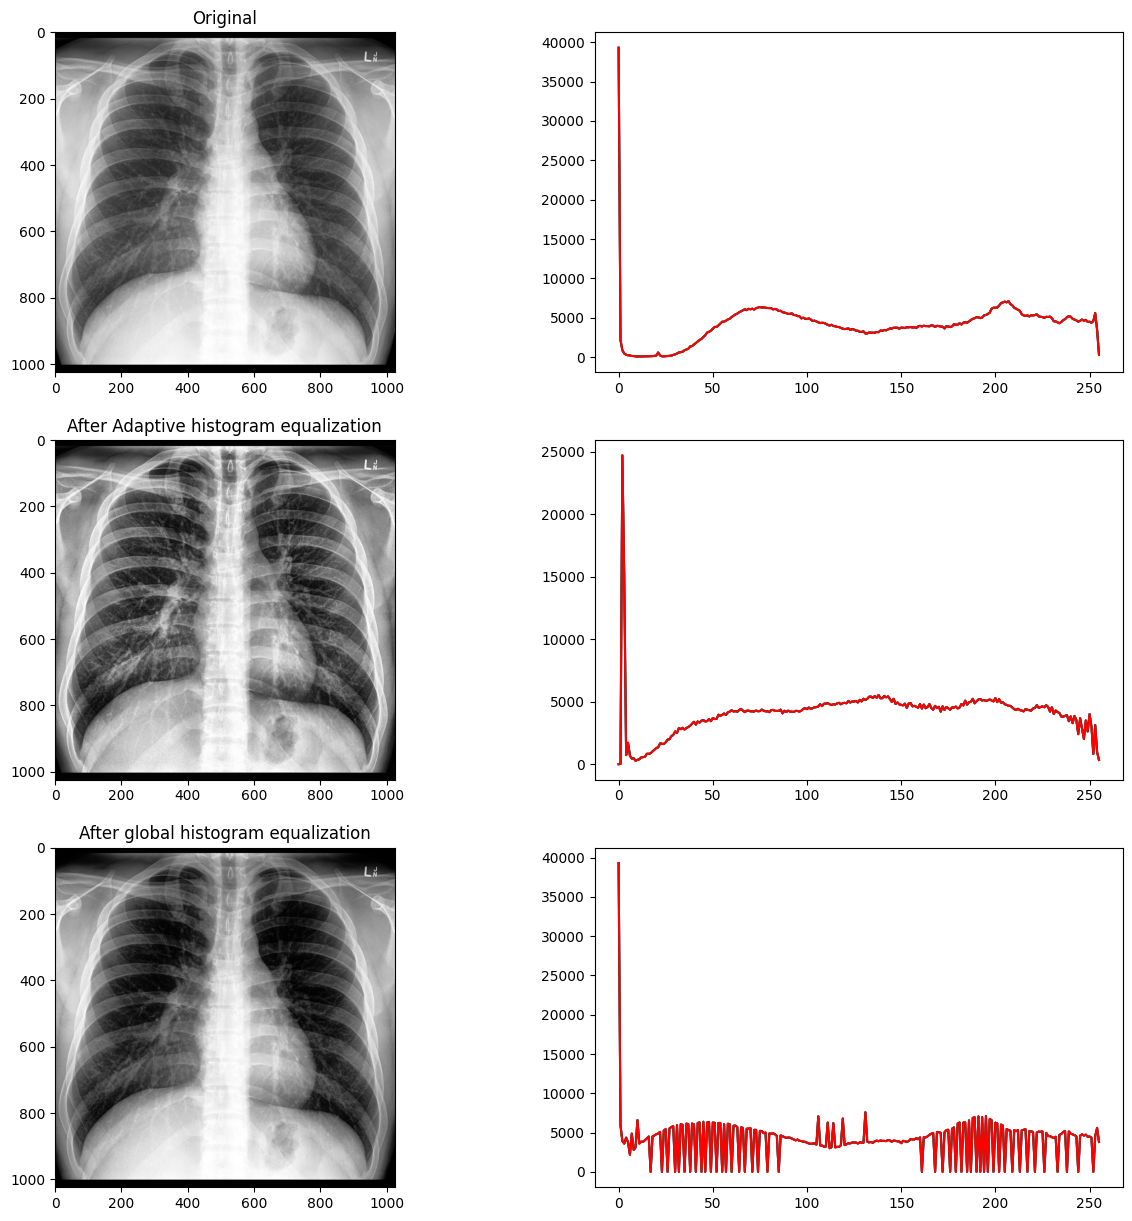

In [18]:
# Import the necessary libraries
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('xray.jpg')

# Split the image into separate color channels (Blue, Green, Red)
channels = cv2.split(image)

# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE to each color channel
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))

# Merge the equalized channels back into an image
eq_clahe_image = cv2.merge(eq_channels)

# Apply global histogram equalization to each color channel
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))

# Merge the equalized channels back into an image
eq_image = cv2.merge(eq_channels)

# Set up the plot figure
plt.figure(figsize=[15,15])

# Plot the original image
plt.subplot(321)
plt.imshow(image[...,::-1])
plt.title("Original")

# Plot the image after adaptive histogram equalization
plt.subplot(323)
plt.imshow(eq_clahe_image[...,::-1])
plt.title("After Adaptive Histogram Equalization")

# Plot the image after global histogram equalization
plt.subplot(325)
plt.imshow(eq_image[...,::-1])
plt.title("After Global Histogram Equalization")

# Calculate and plot the histograms for the original image
color = ('b', 'g', 'r')
plt.subplot(322)
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Calculate and plot the histograms for the image after adaptive histogram equalization
plt.subplot(324)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Calculate and plot the histograms for the image after global histogram equalization
plt.subplot(326)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Show the plot
plt.show()